# Problem Set N1 Solutions

_PHY 323 Spring 2024, Prof. Ian Beatty_

## Problem 1: Burn Rate

### a) Plot the rocket's acceleration vs. time function.

The function we're given is:

$$ a(t) = A\,t^2\,e^{-C\,t^2} $$

I could _sketch_ this qualitatively by hand, but to make a more careful plot, I'll need to calculate the acceleration numerically for each of many different time values and plot the $(t,a)$ pairs. I can't do this without having numerical values for the parameters $A$ and $C$.

So, I'll transform my equation into a dimensionless form, rescaling time and distance to absorb those pesky parameters.

If I define $\underset{\sim}{t} = c^{1/2}\,t$, the exponent becomes parameter-free and necessarily dimensionless. (Note: I'll use under-tildes to signify the dimensionless, scaled versions of variables.) I'll have to replace all occurrences of $t$ with $\underset{\sim}{t}/c^{1/2}$ in the equation, and $dt$ with $d\underset{\sim}{t}/c^{1/2}$ in the derivative. (Note that the second derivative involves $dt^2$.)

$$ \frac{d^2 x}{dt^2} = A\,t^2\,e^{-C\,t^2}
    \ \Rightarrow \ 
    C\, \frac{d^2 x}{d\underset{\sim}{t}^2} = A\, \frac{\underset{\sim}{t}^2}{C}\, e^{-\underset{\sim}{t}^2}
    \ \Rightarrow \ \frac{C^2}{A}\, \frac{d^2 x}{d\underset{\sim}{t}^2} = \underset{\sim}{t}^2\, e^{-\underset{\sim}{t}^2}
$$

If I now define a scaled position variable $\underset{\sim}{x} \equiv C^2\,x / A$, it absorbs the remaining combination of parameters to leave:

$$ \frac{d^2 \underset{\sim}{x}}{d\underset{\sim}{t}^2} = \underset{\sim}{t}^2\, e^{-\underset{\sim}{t}^2} $$

_This_ is a parameterless, dimensionless equation that I can deal with numerically! Here's a plot of the dimensionless acceleration $d^2 \underset{\sim}{x} / d\underset{\sim}{t}^2$ vs. $\underset{\sim}{t}$:

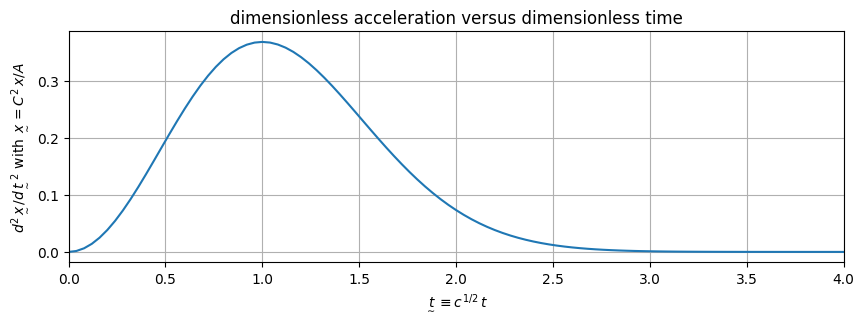

In [11]:
# Make the plot…
import numpy as np
import matplotlib.pyplot as plt
def A(T):
    return T**2 * np.exp(-T**2)
T_values = np.linspace(0, 4, 101)
A_values = A(T_values)
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(T_values, A_values)
ax.set_xlim(0, 4)
ax.set_xlabel(r'$\underset{\sim}{t} \equiv c^{1/2}\,t$')
ax.set_ylabel(r'$d^2 \underset{\sim}{x} / d\underset{\sim}{t}^2$ with $\underset{\sim}{x} = C^2\,x / A$')
ax.grid(True)
ax.set_title('dimensionless acceleration versus dimensionless time')
pass

I've also plotted the function in the accompanying spreadsheet, to illustrate how to do it that way.

### b) Find an expression for the rocket's speed vs. time.

This is a 1D problem and I can define the rocket's direction of motion to be the positive $x$ direction, so speed vs. time is eqivalent to velocity vs. time.

I can get dimensionless velocity vs. time by integrating the above expression for dimensionless acceleration vs. time, noting that the rocket's initial velocity is zero:

$$ \underset{\sim}{v}(\underset{\sim}{t}) = \cancel{\underset{\sim}{v}(0)} + \int_0^{\underset{\sim}{t}} \underset{\sim}{a}(\underset{\sim}{t})\, d\underset{\sim}{t}' 
\ \Rightarrow \ \boxed{ \underset{\sim}{v}(\underset{\sim}{t}) = \int_0^{\underset{\sim}{t}} \underset{\sim}{t}'^2\, e^{-\underset{\sim}{t}'^2}\,d\underset{\sim}{t}' } $$

Unfortunately, this integral is not analytically solvable. This is as far as I can go to "find an expression for" the velocity vs. time.

### c) Find the rocket's asymptotic $(t \to \infty)$ speed.

However, this specific definite integral from 0 to infinity _can_ be evaluated analytically (or looked up or solved with Wolfram Alpha), and the value turns out to be:

$$ \underset{\sim}{v}(\infty) = \int_0^{\infty} \underset{\sim}{t}'^2\, e^{-\underset{\sim}{t}'^2}\,d\underset{\sim}{t}' = \frac{\sqrt{\pi}}{4} $$

(If you didn't figure that out, it's okay. You could also proceed with part (d), and then read off an approximate value of the asymptotic speed from the graph.)

To get an actual value for the speed (in terms of the unspecified parameters A and C), I'll have to transform back to SI coordinates, using $dx = A\,dX / c^2$ and $dt = d\underset{\sim}{t} / c^{1/2}$:

$$ \begin{split}
    v(t) &\equiv \frac{dx}{dt} = \frac{A}{C^2}\,C^{1/2}\,\frac{d\underset{\sim}{x}}{d\underset{\sim}{t}} = \frac{A}{C^{3/2}}\,\underset{\sim}{v}(\underset{\sim}{t})
    \\ \\
    \Rightarrow \ v(\infty) &= \frac{A}{C^{3/2}}\,\underset{\sim}{v}(\infty) \ \Rightarrow \ \boxed{ v(\infty) = \frac{A}{C^{3/2}}\,\frac{\sqrt{\pi}}{4} }
\end{split}$$

### d) Make a plot of the rocket's speed vs. time.

This is just a matter of evaluating the numerical integral for $\underset{\sim}{v}(\underset{\sim}{t})$ and plotting the result. I'll do that in the accompanying spreadsheet, using the velocity-update portion of the Euler-Cromer update recipe:

$$ \underset{\sim}{v}(\underset{\sim}{t} + \Delta \underset{\sim}{t}) = \underset{\sim}{v}(\underset{\sim}{t}) + \underset{\sim}{a}(\underset{\sim}{t})\,\Delta \underset{\sim}{t} $$

### e) Figure out how to determine the time required for the rocket to reach a specified distance.

Now that I've got numerical values for velocity vs. time, I can numerically integrate that to get position vs. time. I've added a column for that to the spreadsheet, using the position-update portion of the Euler-Cromer recipe:

$$ \underset{\sim}{x}(\underset{\sim}{t} + \Delta \underset{\sim}{t}) = \underset{\sim}{x}(\underset{\sim}{t}) + \underset{\sim}{v}(\underset{\sim}{t} + \Delta \underset{\sim}{t})\,\Delta \underset{\sim}{t} $$

To find the time required to reach any specific distance $x_1$, I can (given numerical values for the parameters $A$ and $C$), calculate the corresponding scaled distance $\underset{\sim}{x}_1 = C^2\,x_1 / A$, and then scan down the spreadsheet to find the scaled time $\underset{\sim}{t}_1$ at which the rocket's scaled position passes that value. (I can find this to any desired precision by decreasing the step size $\Delta \underset{\sim}{t}$ in the numerical integration.) Then, I can calculate the actual time $t_1 = \underset{\sim}{t}_1 / C^{1/2}$.

---

## Problem 2: The Precession of Mercury

The accompanying spreadsheet file, `PS-N1-Solutions-2.xlsx`, has a second tab with my implementation of the Euler-Cromer solution to this problem. I'll add some comments about the implementation here, soon.

---